# Итоговое задание Юнит 2.

### Цели и задачи.
Провести разведывательный анализ данных исходного датасета, содержащего сведения об условии жизни учащихся в возрасте от 15 до 22 лет, и составить отчёт по результатам EDA.

# 0. Подготовка

Импортируем необходимые библиотеки и загружаем датасет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.sandbox.stats.multicomp import multipletests

# Задаем параметры отображения. Чем больше информации на экране, тем лучше.
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

In [2]:
students = pd.read_csv(
    r'C:\Users\lsdes\YandexDisk\SkillFactory\module_2\!PROJECT\stud_math.csv')

### Общий обзор данных

In [3]:
display(students.head(20))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
display(students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

Правим название столбца 20. Остальные столбцы имеют приемлемые имена.

In [5]:
columns = list(students.columns)
columns[20] = 'studytime_granular'
students.columns = columns

# 1. Первичная обработка данных

### Вспомогательные функции

In [6]:
# Вывод первичной общей информации
def common_info(column):
    display(students[column].value_counts())
    display(students.loc[:, [column]].info())


# Определение min и max для числовых значений. На вход подаем имя столбца, на выходе [min,max]
def min_max(column):
    IQR = students[column].quantile(0.75) - students[column].quantile(0.25)
    minimum = students[column].quantile(0.25) - 1.5*IQR
    maximum = students[column].quantile(0.75) + 1.5*IQR
    return [minimum, maximum]

# Вывод информации о числовом столбце. На вход название столбца


def numeric_col_info(column):
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(students[column])
    axes[0].set_title(column)
    # axes[1].boxplot(students[column])
    # axes[1].set_title(column)
    sns.boxplot(y=students[column])
    print("Определение выбросов по межквартильному методу:")
    min_col, max_col = min_max(column)
    print("Для столбца {} min-значение: {} , max-значение: {}".format(column, min_col, max_col))

# Отсечение выбросов для pd.Series по межквартильному методу.
# Аргументы: имя столбцаm, min_out =True отсечение по параметру минимума,
# max_out = True отсечение по параметру максимума.


def remove_outliers(column, min_out=False, max_out=False):
    min_col, max_col = min_max(column)
    global students
    # Если min_out == True, отсекаем по параметру минимума для межквартильного метода.
    if min_out:
        students = students.loc[students[column] > min_col]
    if max_out:
        students = students.loc[students[column] < max_col]

# Вывод боксплотов по номинативному столбцу. На вход - имя столбца.


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, 'address'].isin(
                    students.loc[:, 'address'].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Тест Стьюдента для номинативных столбцов. На вход - название столбца


def get_stat_dif(column):
    # p - список значений p, для всех пар
    pvals = []

    cols = list(students.loc[:, column].value_counts().index[:])
    # Удаляем значение noinfo, так как мы не значем истинного значения
    if 'noinfo' in cols:
        cols.remove('noinfo')

    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        # Подсчитываем значения pval для всех комбинаций
        pvals.append(ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                               students.loc[students.loc[:, column] == comb[1], 'score']).pvalue)

    # Используем метод Бенджамини — Хохберга для FDR-контроля означает,
    if True in multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False)[0]:
        print("Найдены статистически значимые различия для столбца " + column)

Рассмотрим в отдельности каждый столбец.

### Столбец **school**

In [7]:
common_info('school')

GP    349
MS     46
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

В выборке присутствуют данные только по двум школам. Пустых значений нет. Среди значений всего два возможных вараинта.
На данном этапе рассмотрение столбца закончено.

### Столбец **sex**

In [8]:
common_info('sex')

F    208
M    187
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Данные по полам в выборке внесены корректно. Только 2 пола, пропусков нет.
На данном этапе рассмотрение столбца закончено.

### Столбец **age**

In [9]:
common_info('age')

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


None

Данные по возрасту внесены корректно. Пропусков нет, нечисловых значений нет. На данном этапе рассмотрение столбца закончено.

### Столбец **address**

In [10]:
common_info('address')

U    295
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Данные по адресу имеют пропуски. Некорректных значений нет. Среди значений всего два возможных вараинта. На данном этапе рассмотрение столбца закончено.

### Столбец **famsize**

In [11]:
common_info('famsize')

GT3    261
LE3    107
Name: famsize, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта. На данном этапе рассмотрение столбца закончено.

### Столбец **Pstatus**

In [12]:
common_info('Pstatus')

T    314
A     36
Name: Pstatus, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта. На данном этапе рассмотрение столбца закончено.

### Столбец **Medu** 

In [13]:
common_info('Medu')

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

3.0

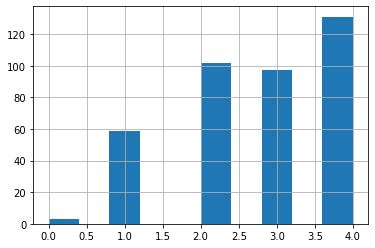

In [14]:
students.Medu.hist()
students.Medu.median()

Судя по графику и по медиане (3.0), большинство матерей имеет средне-специальное или высшее образование.
Некорректных значений в столбце нет. На данном этапе рассмотрение столбца закончено.

### Столбец **Fedu** 

In [15]:
common_info('Fedu')

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

В столбце присутствует одно некорректное значение. Сделаем допущение, что имела место опечатка. Исправим вручную.

In [16]:
students.loc[students['Fedu'] == 40, 'Fedu'] = 4.0

2.0

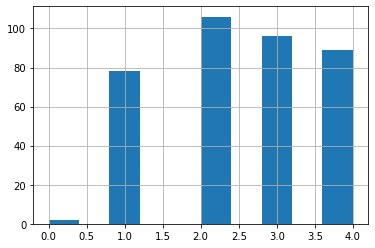

In [17]:
students.Fedu.hist()
students.Fedu.median()

Судя по графику и по медиане (2.0), образование отцов в большинстве хуже, чем у матерей.
Некорректные значения исправлены. На данном этапе рассмотрение столбца закончено.

### Столбец **Mjob** 

In [18]:
common_info('Mjob')

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений пять вариантов. На данном этапе рассмотрение столбца закончено.

### Столбец **Fjob** 

In [19]:
common_info('Fjob')

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений пять вариантов. На данном этапе рассмотрение столбца закончено.

### Столбец **reason** 

In [20]:
common_info('reason')

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений четыре возможных вараинта. На данном этапе рассмотрение столбца закончено.

### Столбец **guardian** 

In [21]:
common_info('guardian')

mother    250
father     86
other      28
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений три два возможных вараинта. На данном этапе рассмотрение столбца закончено.

### Столбец **traveltime**

In [22]:
common_info('traveltime')

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

1.0

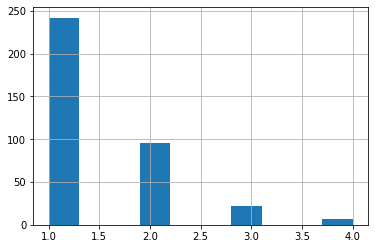

In [23]:
students.traveltime.hist()
students.traveltime.median()

Большинство учеников живет в непосредственной близости от школы, о чем свидетельствует распределение данных на графике и медиана. Занчение 1 - подразумеывает, что ученик тратит менее 15 минут на дорогу.

Некорректных значений в столбце нет. На данном этапе рассмотрение столбца закончено.

### Столбец **studytime** 

In [24]:
common_info('studytime')

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

2.0

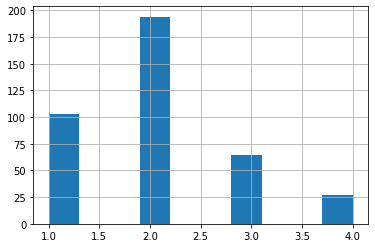

In [25]:
students.studytime.hist()
students.studytime.median()

БОльшая часть учеников тратит от 2 до 5 часов на учебу вне школы.
Некорректных значений в столбце нет. На данном этапе рассмотрение столбца закончено.

### Столбец **failures**  

In [26]:
common_info('failures')

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Подавляющее число учеников не сталкивались с внеучебными неудачами.

Некорректных значений в столбце нет.

### Столбец **schoolsup**  

In [27]:
common_info('schoolsup')

no     335
yes     51
Name: schoolsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта.

### Столбец **famsup**  

In [28]:
common_info('famsup')

yes    219
no     137
Name: famsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта.

### Столбец **paid**  

In [29]:
common_info('paid')

no     200
yes    155
Name: paid, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта.

### Столбец **activities**  

In [30]:
common_info('activities')

yes    195
no     186
Name: activities, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта.

### Столбец **nursery**


In [31]:
common_info('nursery')

yes    300
no      79
Name: nursery, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта.

### Столбец **studytime_granular** 

In [32]:
common_info('studytime_granular')

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Вероятно, данный столбец означает время, затрачиваемое на учебу в школе. Время измеряется в часах, но представлено с отрицательными значениеями. Заменим отрицательные значения на положительные.

In [33]:
students.studytime_granular = students.studytime_granular.apply(lambda x: -1*x)

6.0

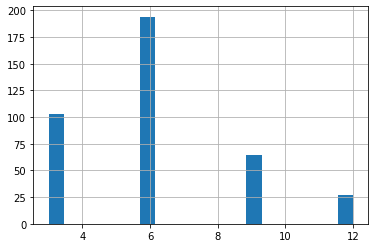

In [34]:
students.studytime_granular.hist(bins=20)
students.studytime_granular.median()

Неописанный в задании параметр. Пока не ясно, его значение.

### Столбец **higher** 

In [35]:
common_info('higher')

yes    356
no      19
Name: higher, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Подавляющее большинство детей хотят получить высшее образование. Среди значений всего два возможных вараинта.

### Столбец **internet** 

In [36]:
common_info('internet')

yes    305
no      56
Name: internet, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта.

### Столбец **romantic** 

In [37]:
common_info('romantic')

no     240
yes    124
Name: romantic, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

Некорректных значений в столбце нет. Среди значений всего два возможных вараинта.

### Столбец **famrel** 

In [38]:
common_info('famrel')

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

Присутствует одно некорректное значение оценки. -1 - не ясно, это ошибочно поставленный минус, отсутствие оценки или показатель, что отношения в семье "пробили дно". Заменим данное значение на NaN.

In [39]:
students.loc[students['famrel'] == -1.0, 'famrel'] = np.nan

Некорректных значений в столбце нет.

### Столбец **freetime** 

In [40]:
common_info('freetime')

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

3.0

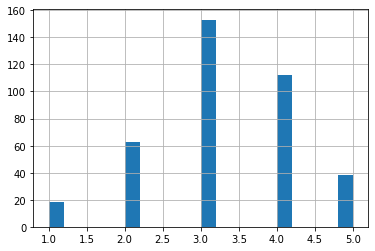

In [41]:
students.freetime.hist(bins=20)
students.freetime.median()

Распределение похоже на нормальное. В целом у детей достаточное количество свободного времени.

Некорректных значений в столбце нет.

### Столбец **goout** 

In [42]:
common_info('goout')

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

3.0

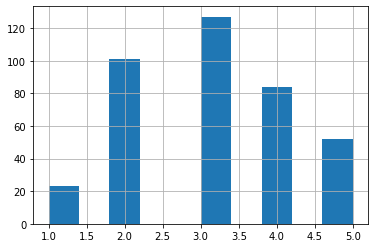

In [43]:
students.goout.hist()
students.goout.median()

Столбец схож со значением freetime, скорее всего, данные кореллируют. Такое же нормальное распределение.

Некорректных значений в столбце нет.

### Столбец **health** 

In [44]:
common_info('health')

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

4.0

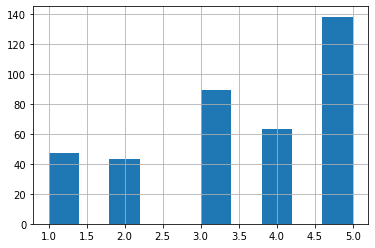

In [45]:
students.health.hist()
students.health.median()

Некорректных значений в столбце нет.

### Столбец **absences** 

In [46]:
common_info('absences')

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

4.0

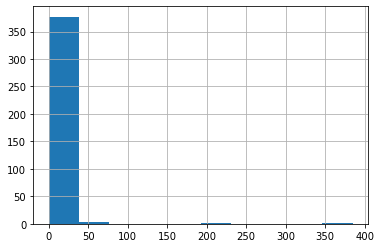

In [47]:
students.absences.hist()
students.absences.median()

Присутствуют выбросы. В следующем разделе будет рассмотрен вопрос отсчечения.

### Столбец **score** 

In [48]:
common_info('score')

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

В целевом показателе присутствуют пропуски. Строки с пропусками удаляем.

In [49]:
students = students[~(np.isnan(students.score))]

55.0

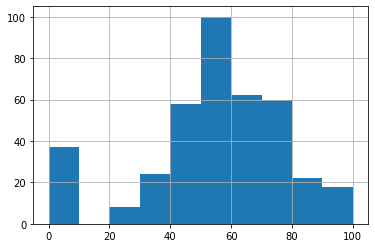

In [50]:
students.score.hist()
students.score.median()

Гистограмма выглядит так, как будто присутствуют выбросы. В следующем разделе вопрос выбросов будет рассмотрен подробнее.

# 2. Анализ распределения признаков числовых переменных.

### Столбец **age** 

Определение выбросов по межквартильному методу:
Для столбца age min-значение: 13.0 , max-значение: 21.0


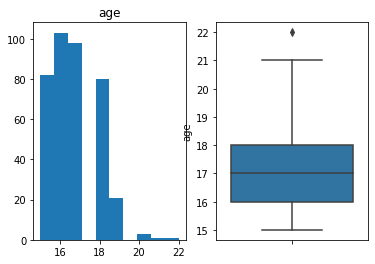

In [51]:
numeric_col_info('age')

Присутствуют выбросы. Однако, в условии задания оговорены возрастные рамки выборки, поэтому устранять данный выброс смысла не имеет.

### Столбец **Medu**

Определение выбросов по межквартильному методу:
Для столбца Medu min-значение: -1.0 , max-значение: 7.0


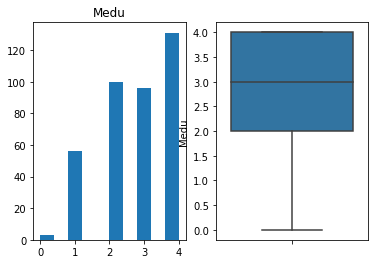

In [52]:
numeric_col_info('Medu')

Выбросы отсутствуют.

### Столбец **Fedu**

Определение выбросов по межквартильному методу:
Для столбца Fedu min-значение: 0.5 , max-значение: 4.5


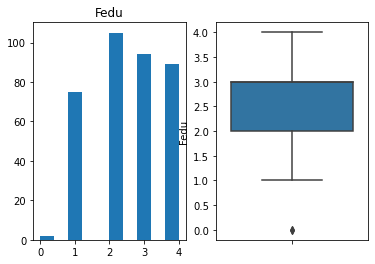

In [53]:
numeric_col_info('Fedu')

Присутствуют выборсы. Удаляем строки, содержащие выборсы.

In [54]:
remove_outliers('Fedu', min_out=True, max_out=True)

### Столбец **traveltime**

Определение выбросов по межквартильному методу:
Для столбца traveltime min-значение: -0.5 , max-значение: 3.5


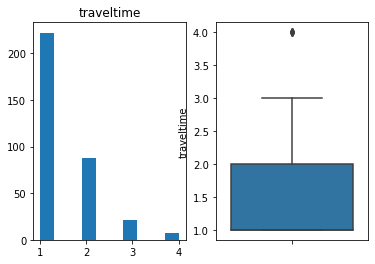

In [55]:
numeric_col_info('traveltime')

Присутствуют выбросы. Удаляем их с помощью межквартильного метода.

In [56]:
remove_outliers('traveltime', min_out=True, max_out=True)

### Столбец **studytime**

Определение выбросов по межквартильному методу:
Для столбца studytime min-значение: -0.5 , max-значение: 3.5


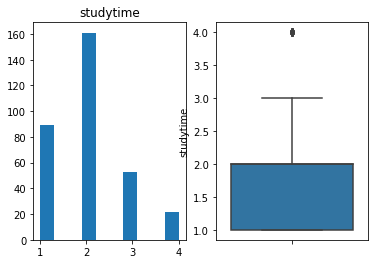

In [57]:
numeric_col_info('studytime')

Присутствуют выбросы. Удаляем их с помощью межквартильного метода.

In [58]:
remove_outliers('studytime', min_out=True, max_out=True)

### Столбец **failures**

<AxesSubplot:>

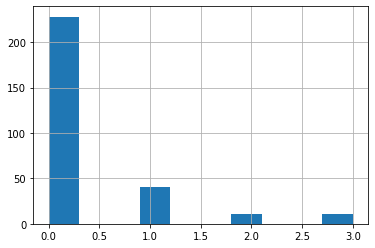

In [59]:
students.failures.hist()

При такой распределении выбросами являются любые значения, отличные от 0. Однако, данный признак может быть важен и влиять на целевой показатель.

### Столбец **studytime_granular**

Определение выбросов по межквартильному методу:
Для столбца studytime_granular min-значение: -1.5 , max-значение: 10.5


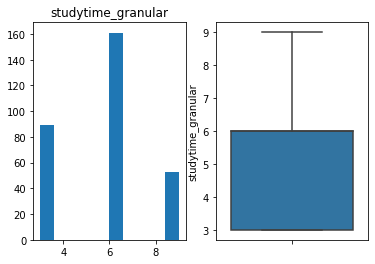

In [60]:
numeric_col_info('studytime_granular')

Присутствуют выбросы. Удаляем их с помощью межквартильного метода.

In [61]:
remove_outliers('studytime_granular', min_out=True, max_out=True)

Определение выбросов по межквартильному методу:
Для столбца studytime_granular min-значение: -1.5 , max-значение: 10.5


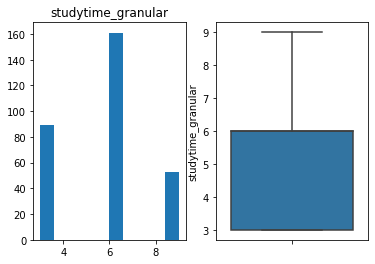

In [62]:
numeric_col_info('studytime_granular')

Выбросов устранены.

### Столбец **famrel**

Определение выбросов по межквартильному методу:
Для столбца famrel min-значение: 2.5 , max-значение: 6.5


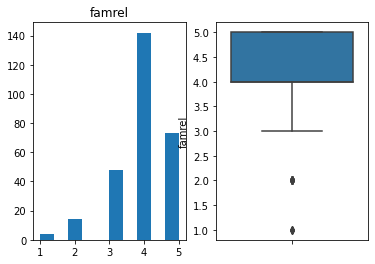

In [63]:
numeric_col_info('famrel')

Присутствуют выбросы. Отношения в семье могут выступать важным индикатором и влиять на целевой результат. На мой взгляд, не стоит устранять выбросы в данном столбце.

### Столбец **freetime**

В предыдущем разделе было высказано предположение о корелляции данных свободного времени и времени, проведенного с друзьями. Проверим эту теорию.

In [64]:
students.loc[:, ['freetime', 'goout']].corr()

,freetime,goout
freetime,1.000000,0.231155
goout,0.231155,1.000000


Судя по коэффициентам корелляции, взаимосвязь двух параметров отсутствует.

Определение выбросов по межквартильному методу:
Для столбца freetime min-значение: 1.5 , max-значение: 5.5


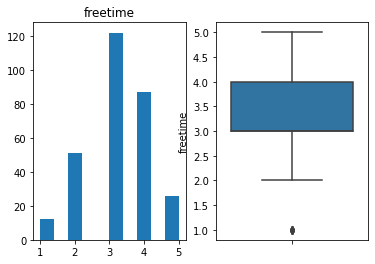

In [65]:
numeric_col_info('freetime')

Присутствуют выбросы. Удаляем их с помощью межквартильного метода.

Определение выбросов по межквартильному методу:
Для столбца freetime min-значение: 1.5 , max-значение: 5.5


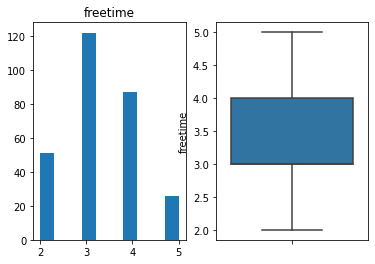

In [66]:
remove_outliers('freetime', min_out=True, max_out=True)
numeric_col_info('freetime')

### Столбец **goout**

Определение выбросов по межквартильному методу:
Для столбца goout min-значение: -1.0 , max-значение: 7.0


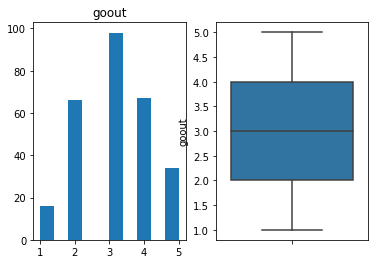

In [67]:
numeric_col_info('goout')

Выбросы отсутствуют.

### Столбец **health**

Определение выбросов по межквартильному методу:
Для столбца health min-значение: -2.5 , max-значение: 9.5


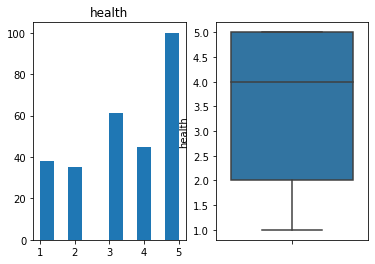

In [68]:
numeric_col_info('health')

Выбросов нет.

### Столбец **absences**

Определение выбросов по межквартильному методу:
Для столбца absences min-значение: -12.0 , max-значение: 20.0


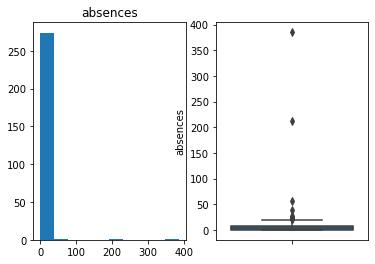

In [69]:
numeric_col_info('absences')

Присутствуют выбросы. Удаляем их с помощью межквартильного метода.

Определение выбросов по межквартильному методу:
Для столбца absences min-значение: -10.125 , max-значение: 16.875


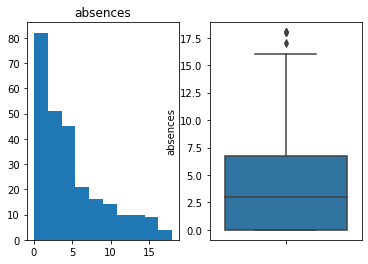

In [70]:
remove_outliers('absences', min_out=True, max_out=True)
numeric_col_info('absences')

Даже после одной процедуры устранения выбросов, с точки зрения межквартильного метода, выбросы остались. Но если еще сильнее усечь выборку, возможна потеря большой части данных.

### Столбец **score**

Определение выбросов по межквартильному методу:
Для столбца score min-значение: 2.5 , max-значение: 102.5


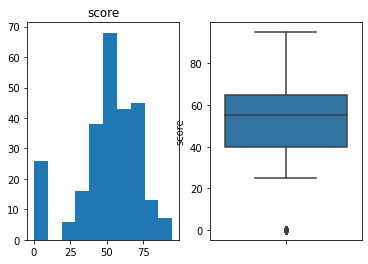

In [71]:
numeric_col_info('score')

Присутствуют выбросы. Удаляем их с помощью межквартильного метода.

Определение выбросов по межквартильному методу:
Для столбца score min-значение: 7.5 , max-значение: 107.5


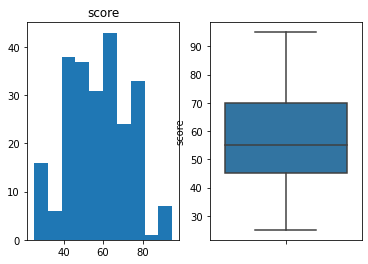

In [72]:
remove_outliers('score', min_out=True, max_out=True)
numeric_col_info('score')

Выбросы устранены.

# 3. Корелляционный анализ.

Построим тепловую карту для числовых столбцов, данные в которых есть отношения порядка.

<AxesSubplot:>

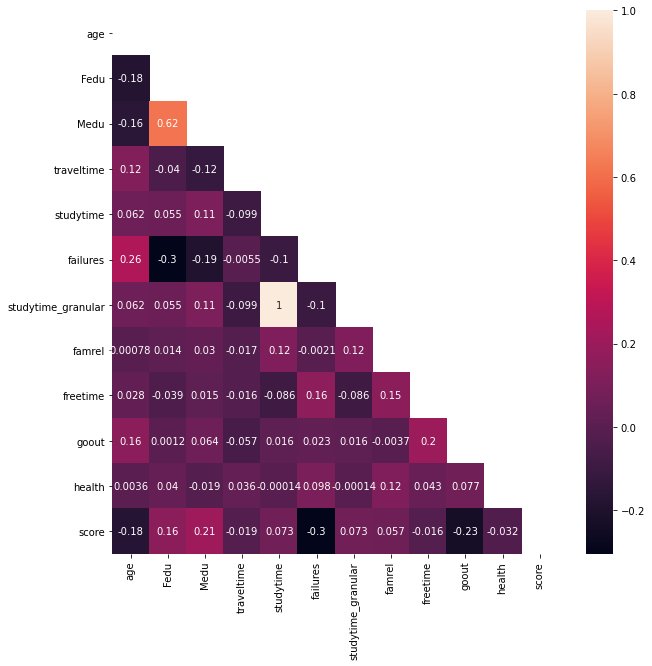

In [73]:
stud_numeric_cols = students.loc[:, ['age', 'Fedu', 'Medu', 'traveltime', 'studytime',
                                     'failures', 'studytime_granular', 'famrel', 'freetime', 'goout', 'health', 'score']]
fig, ax = plt.subplots(figsize=[10, 10])
matrix = np.triu(stud_numeric_cols.corr())
sns.heatmap(stud_numeric_cols.corr(), annot=True, mask=matrix)

Исходя из данных, есть две пары параметров, значения которых достаточно сильно скореллированы. 

### 3.1. Fedu и Medu
Параметры имеют корелляцию 0.62, таким образом существует связь между уровнем образования супругов, но степень корелляции не достаточна высока (<0.7) для того, чтобы удалить один из столбцов.

## 3.2. studytime и studytime_granular

Данные параметры имеют коэффициент корреляции 1, это очень высокое значение, говорящее, что, скорее всего, представленные два параметра являются отображением одной и той же сущности.
Удаляем стобцем studytime_granular.

In [74]:
students.drop('studytime_granular', 1, inplace=True)

### 3.3. Корелляция числовых параметров с целевым параметром.

Еще раз взглянем на тепловую карту.

<AxesSubplot:>

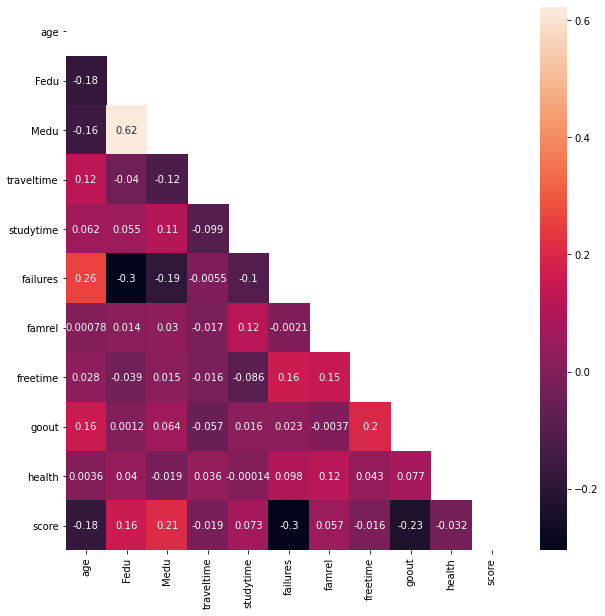

In [75]:
stud_numeric_cols = students.loc[:, ['age', 'Fedu', 'Medu', 'traveltime',
                                     'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'score']]
fig, ax = plt.subplots(figsize=[10, 10])
matrix = np.triu(stud_numeric_cols.corr())
sns.heatmap(stud_numeric_cols.corr(), annot=True, mask=matrix)

Пять из десяти параметров имеют коэффициент корелляции в диапазоне 0.01-0.09. Это низкий коэфициент, но ввиду того, что количество параметров не велико, оставляем все.

# 4. Заполнение пропусков.

Выведем процентное соотношение пропусков и абсолютное значение по столбцам.

In [76]:
for col in students.columns:
    pct_missing = np.mean(students[col].isnull())
    if students[students[col].isnull()].index.size > 0:
        print('{} - {}% - | {} qty'.format(col, round(pct_missing*100),
              students[students[col].isnull()].index.size))

address - 4% - | 9 qty
famsize - 6% - | 13 qty
Pstatus - 9% - | 21 qty
Medu - 1% - | 2 qty
Mjob - 4% - | 10 qty
Fjob - 8% - | 18 qty
reason - 6% - | 13 qty
guardian - 10% - | 24 qty
failures - 4% - | 9 qty
schoolsup - 3% - | 8 qty
famsup - 8% - | 19 qty
paid - 10% - | 24 qty
activities - 5% - | 12 qty
nursery - 5% - | 11 qty
higher - 5% - | 12 qty
internet - 10% - | 23 qty
romantic - 7% - | 17 qty
famrel - 8% - | 18 qty
goout - 2% - | 4 qty
health - 3% - | 6 qty


В номинативных признаках заменим проупски на значение "noinfo".

In [77]:
# Получим список номинативных столбцов с пропусками и числовых (заодно)
str_columns = []
num_columns = []
for col in students.columns:
    if students[students[col].isnull()].index.size > 0:
        if students[col].dtype == 'object':
            str_columns.append(col)
        else:
            num_columns.append(col)

empty_val = 'noinfo'
# Заменяем в номинативных столбцах пропуски
for col in str_columns:
    students[col] = students[col].apply(
        lambda x: empty_val if pd.isnull(x) else x)

In [78]:
for col in students.columns:
    pct_missing = np.mean(students[col].isnull())
    if students[students[col].isnull()].index.size > 0:
        print('{} - {}% - | {} qty'.format(col, round(pct_missing*100),
              students[students[col].isnull()].index.size))

Medu - 1% - | 2 qty
failures - 4% - | 9 qty
famrel - 8% - | 18 qty
goout - 2% - | 4 qty
health - 3% - | 6 qty


Для заполнения пропущенных числовых значений используем класс IterativeImputer от SKlearn, который моделирует каждый параметр с пропущенными значениями в зависимости от других параметров и использует эту оценку для восстановления.

In [79]:
# Получем список столбцов датасета с числовыми значениями
num_columns_names = []
for col in students.columns:
    if students[col].dtype == 'float' or students[col].dtype == 'int':
        num_columns_names.append(col)

# Сбрасываем индекс для датафрейма students
students = students.reset_index(drop=True)

# Получаем первые 50 образцов, не содержащих пропусков вообще.
example = students.head(50)[students.any(axis='columns')].copy()
# Оставляем только числовые столбцы
example = example[num_columns_names]

imp1 = IterativeImputer(max_iter=10, random_state=0)
# Тренируем модель
imp1.fit(example)

IterativeImputer(random_state=0)

# Получаем матрицу с заполненными значениями
tst = abs(np.round(imp1.transform(students[num_columns_names]), 0))
filled_vals = pd.DataFrame(tst, columns=num_columns_names)
students[num_columns_names] = filled_vals[num_columns_names]

<ipython-input-79-9712b6dbe59e>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  example = students.head(50)[students.any(axis='columns')].copy()


Еще раз проверяем на наличие пропусков.

In [80]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      236 non-null    object 
 1   sex         236 non-null    object 
 2   age         236 non-null    int64  
 3   address     236 non-null    object 
 4   famsize     236 non-null    object 
 5   Pstatus     236 non-null    object 
 6   Medu        236 non-null    float64
 7   Fedu        236 non-null    float64
 8   Mjob        236 non-null    object 
 9   Fjob        236 non-null    object 
 10  reason      236 non-null    object 
 11  guardian    236 non-null    object 
 12  traveltime  236 non-null    float64
 13  studytime   236 non-null    float64
 14  failures    236 non-null    float64
 15  schoolsup   236 non-null    object 
 16  famsup      236 non-null    object 
 17  paid        236 non-null    object 
 18  activities  236 non-null    object 
 19  nursery     236 non-null    o

Пропусков нет, можно переходить к следующему этапу.

# 5. Анализ номинативных переменных.

Для анализа построим боксплоты номинативных признаков.

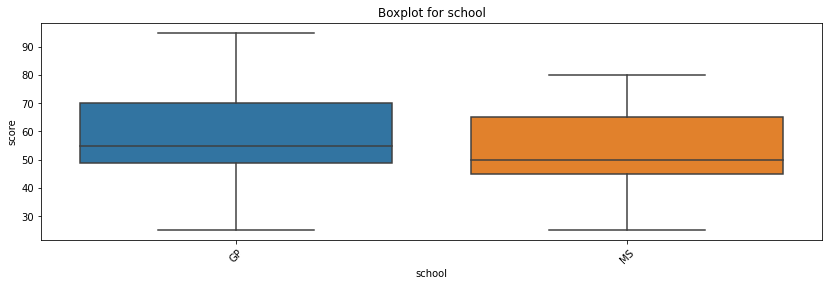

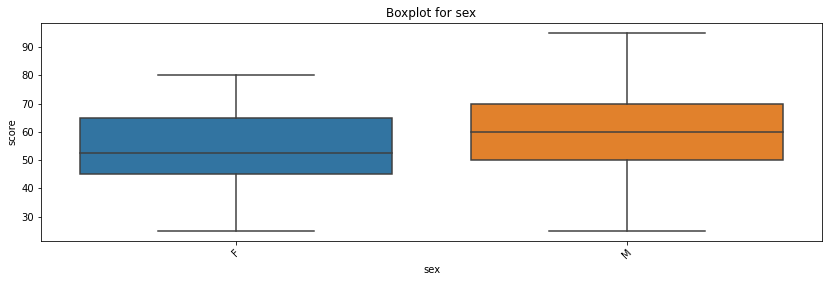

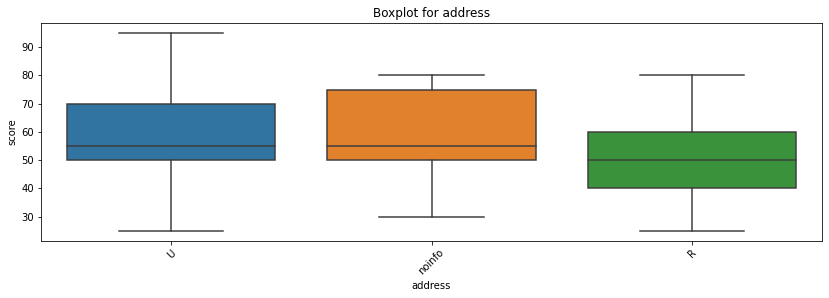

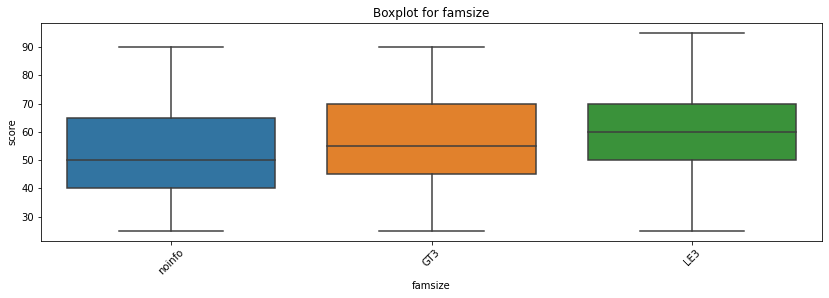

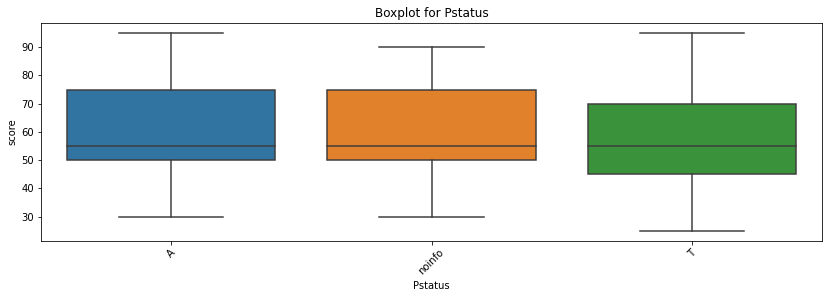

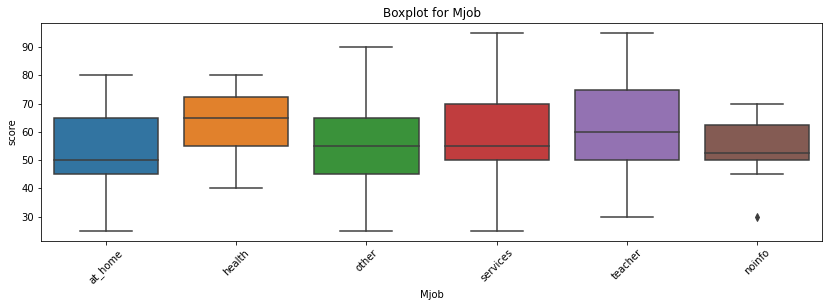

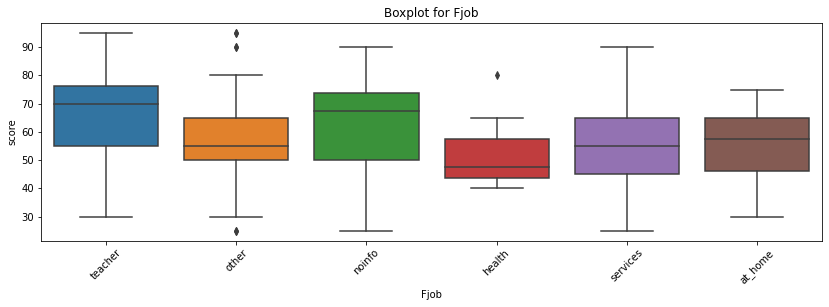

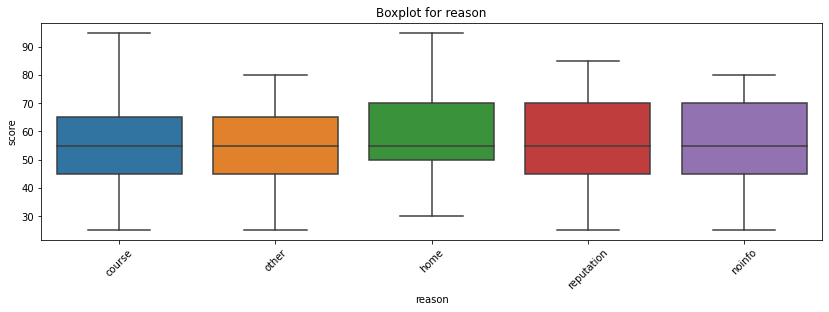

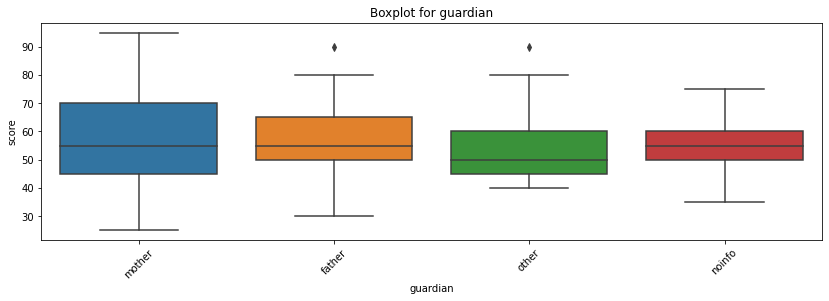

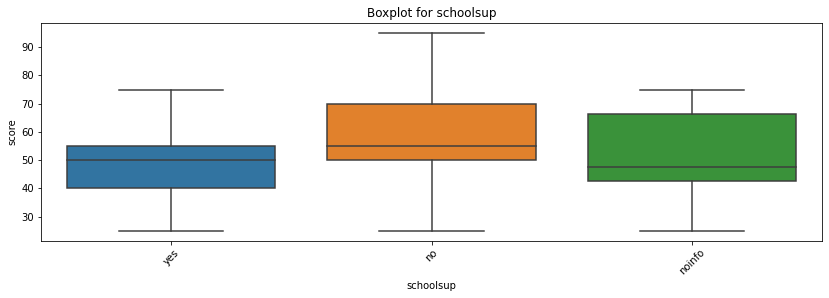

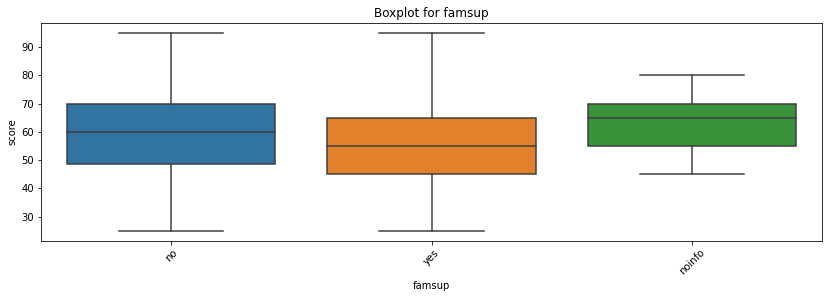

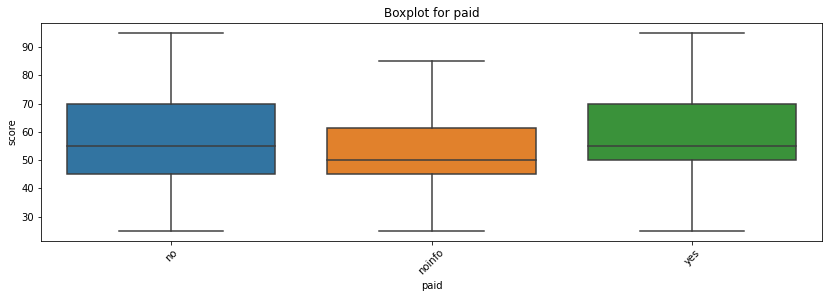

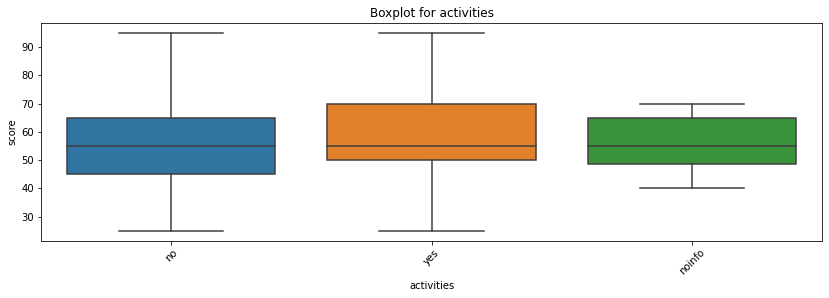

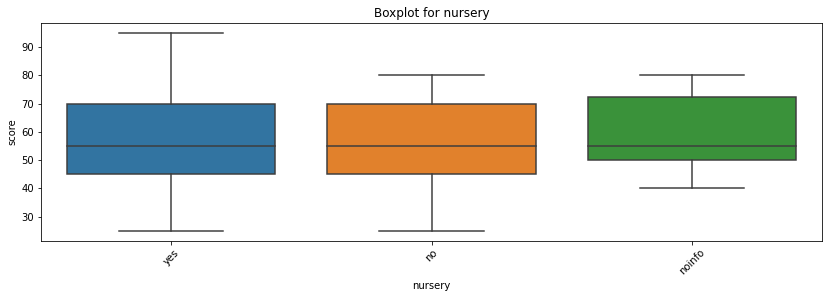

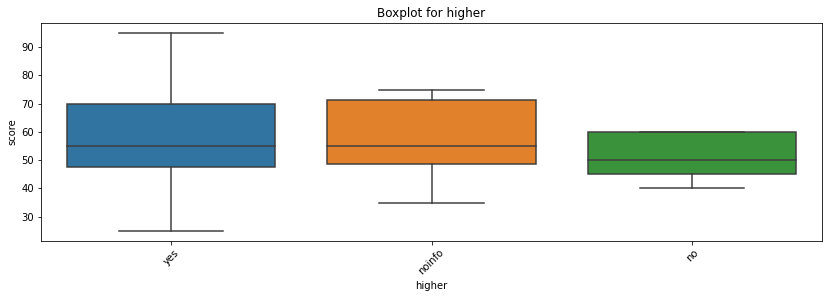

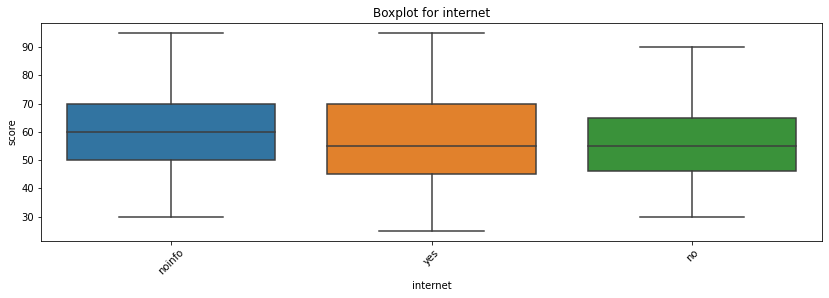

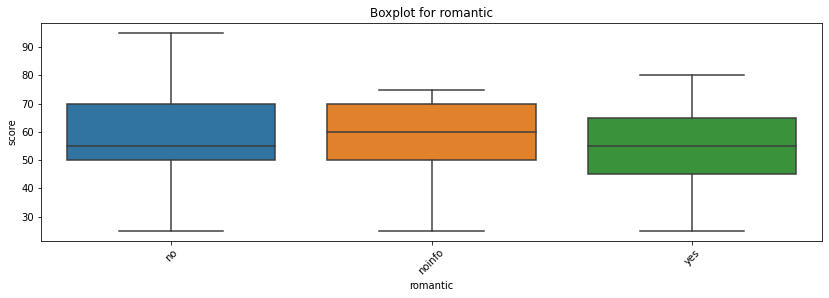

In [81]:
# Получем список столбцов датасета с номинативными значениями
str_columns_names = []
for col in students.columns:
    if students[col].dtype == 'object':
        str_columns_names.append(col)

for col in str_columns_names:
    get_boxplot(col)

Проанализировав графики, можно сделать выводы:
1. Для параметра Pstatus боксполты значений A (родители живут раздельно) и noinfo схожи. Вероятно, пропуски были не случайны, так как дети не желают сообщать о семейных проблемах (MNAR - Missing Not At Random).
2. Для параметра romantic боксполты значений no (респондент не в отношениях) и noinfo схожи. Вероятно, пропуски были не случайны (MNAR).
3. Вероятно, параметры guardian, famsup, paid, activities, nursey - не будут влиять на итоговую оценку.

С помощью теста Стьюдента и метода Бенджамини — Хохберга для FDR-контроля проверим, есть ли статистическая разница в распределении оценок по номинативным признакам.

In [82]:
for col in str_columns_names:
    get_stat_dif(col)

Найдены статистически значимые различия для столбца sex
Найдены статистически значимые различия для столбца address
Найдены статистически значимые различия для столбца schoolsup


В трех столбцах (sex, address, schoolsup) есть достаточные различия, чтобы включить их итоговый датасет. Также в итоговый датасет будут включены все числовые столбцы. Датасет для модели будет иметь следующий вид:

In [83]:
stud_model = students[['sex', 'address', 'schoolsup'] + num_columns_names]
display(stud_model)

,sex,address,schoolsup,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,F,U,yes,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,F,U,no,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,F,U,yes,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,F,U,no,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,F,U,no,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,F,U,no,3.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0,1.0,0.0,40.0
232,M,U,no,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
233,M,R,noinfo,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
234,M,R,no,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


Подсчитаем количество значений noinfo (пропуск) в номинативных столбцах в итоговом датасете.

In [84]:
for col in stud_model.columns:
    if stud_model[col].dtype == 'object':
        print("Количество значений \"noinfo\" в " + col + ": " +
              str(stud_model[stud_model[col] == 'noinfo'].index.size))

Количество значений "noinfo" в sex: 0
Количество значений "noinfo" в address: 9
Количество значений "noinfo" в schoolsup: 8


# 6. Выводы.

В результате проведенного разведывательного анализа можно сделать следующие выводы:
1. В итоговом датасете мало пропущенных значений, 9 и 8 для двух номинативных столбцах.
2. Выбросы в числовых столбцах устранены.
3. Отрицательные коэффициенты корелляции для параметров age, traveltime, failures, freetime, goout в целом понятны. Остается загадкой отрицательная корелляция параметра health - получается, что ухудшение самочувствия положительно сказывается на результате. Либо получение высоких оценок требует значительных умственных ресурсов, что отрицательно сказывается на здоровье.
4. Для построения модели предлагается использовать номинативные параметры sex, address, schoolsup и все числовые.